# **CS F320 FODS Assignment 1**

## **A - Regression without Regularization**

### **Task 1 : Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

# Loading the dataset into pandas dataframe
df_A = pd.read_csv("Data - A1.csv")

# Normalizing feature variable `X`
df_A['X'] = (df_A['X'] - df_A['X'].mean()) / df_A['X'].std()

# Shuffling the dataset
df_A = df_A.sample(frac = 1).reset_index(drop = True)

# Splitting the dataset in 4 : 1 ratio
training, testing = np.split(df_A, [int(0.8 * len(df_A))])
print(training[:3])
print(training.shape)
print(testing[:3])
print(testing.shape)


          X         Y
0 -1.289733  1.190317
1 -0.444915 -0.061226
2 -0.794614  1.011073
(800, 2)
            X         Y
800  0.600721  0.254847
801 -1.196249 -0.422177
802 -1.424766 -2.307222
(200, 2)


### **Task 2 : Polynomial Regression**

In [ ]:
# Seperating features and targets
x = np.ones((len(training), 1))
y = np.ones((len(training), 1))
x = training['X'].values.reshape(len(training), 1)
y = training['Y'].values.reshape(len(training), 1)

BATCH GRADIENT DESCENT

In [ ]:
# Applying Batch Gradient Descent
def bgd(X_poly, w, y_cap, y, learning_rate):
    n = len(y);
    gradient = (1 / n) * np.dot(X_poly.T, (y - y_cap))
    w += learning_rate * gradient
    return w

# Calculating Least Mean Square Error
def LMSError(y_cap, y):
    n = len(y)
    totalSquaredError = np.sum((y_cap - y) ** 2)
    meanSquaredError = (1 / n) * totalSquaredError
    return meanSquaredError

# Creating x matrix
def createPoly(x, i):
    X_poly = np.ones((len(x), i + 1))
    for j in range(1, i + 1):
        X_poly[:, j] = x[:, 0] ** j
    return X_poly

TRAINING ERRORS

In [ ]:
# List for errors obtained for every degree
trainingErrorList = []

# List for final error values of every degree
finalTrainingErrors = []

# List to store weights of 9 polynomial models
weightsPoly = []

# Maximum degree = 9 + 1
maxDegree = 10

# Learning rate
learning_rate = 0.001

# Iterations
epochs = 500

# Buliding model
for i in range(1, maxDegree):
    errors = []

    # Getting polynomial features
    X_poly = createPoly(x, i)
    w = np.zeros((i+1,1))
    for j in range(epochs):
        y_cap = np.dot(X_poly, w)
        errors.append(LMSError(y_cap, y))
        w = bgd(X_poly, w, y_cap, y, learning_rate)

    weightsPoly.append(w)
    trainingErrorList.append(errors)
    finalTrainingErrors.append(errors[-1])

print(finalTrainingErrors)

[2.408102608076888, 2.24741501043976, 1.1760197961878527, 1.225341029941573, 1.2383342812718563, 1.2399152373708662, 1.2702178689980261, 1.2511614592296119, 1.1787332811356728]


TESTING ERRORS

In [ ]:
# Seperating feature and target values
x_test = np.ones((len(testing), 1))
y_test = np.ones((len(testing), 1))
x_test = testing['X'].values.reshape(len(testing),1)
y_test = testing['Y'].values.reshape(len(testing),1)

# Testing the models
finalTestingErrors = []
for i in range(1, maxDegree):
    X = createPoly(x_test,i)
    y_cap = np.dot(X, weightsPoly[i - 1])
    finalTestingErrors.append(LMSError(y_cap, y_test))

print(finalTestingErrors)


[2.3990734663400657, 2.114616006649902, 1.1455425171288218, 1.198537179501219, 1.2245568190782514, 1.2279220076158752, 1.2542354856792295, 1.2197557625689601, 1.1694224822521713]


### **Task 3: Graph Plotting**

PLOT 1- Final Training and Testing Errors vs. Degree of Polynomial

PLOT 2- Training Error and Testing Error v/s Epochs for all degree of polynomials FROM 1 TO 9

PLOT 3- Best Polynomial Fitted Curve on a subset of Data Points

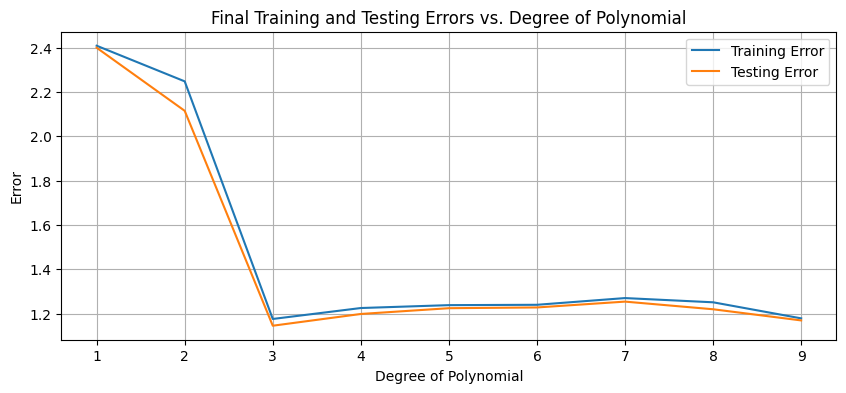

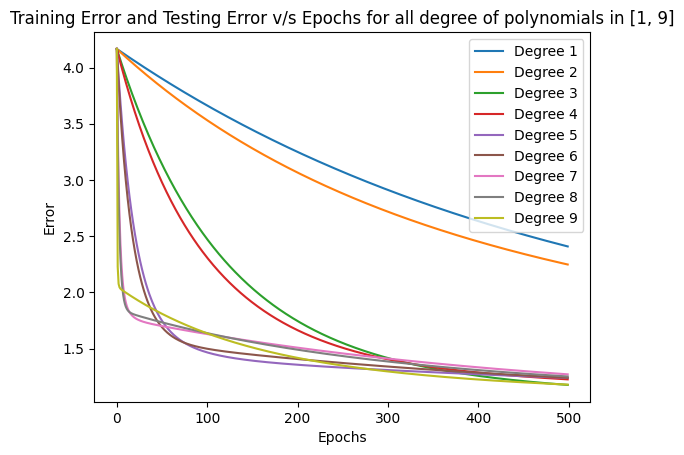

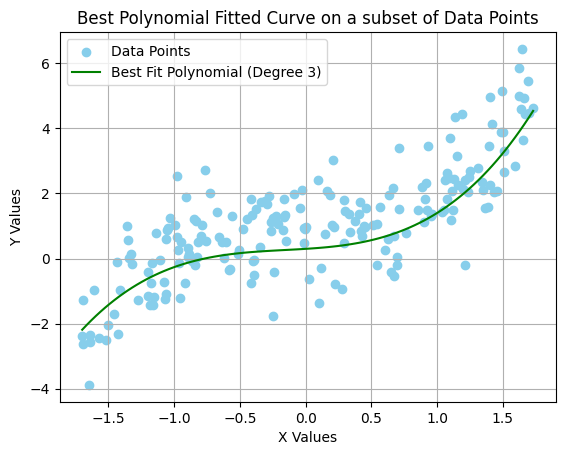

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.grid(True)

# Plotting Final Training and Testing Errors vs. Degree of Polynomial
plt.plot(range(1, maxDegree), finalTrainingErrors, label='Training Error')
plt.plot(range(1, maxDegree), finalTestingErrors, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Final Training and Testing Errors vs. Degree of Polynomial')
plt.legend()
plt.show()

print("\n")

# Plotting Training Error and Testing Error v/s Epochs for all degree of polynomials in [1, 9]
for degree in range(maxDegree - 1):
    plt.plot(range(epochs), trainingErrorList[degree], label=f'Degree {degree+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
plt.title('Training Error and Testing Error v/s Epochs for all degree of polynomials in [1, 9]')
plt.show()

print("\n")


# Plotting Best Polynomial Fitted Curve on a subset of Data Points
best_degree = np.argmin(finalTestingErrors) + 1
best_model_coefficients = weightsPoly[best_degree - 1]
plt.scatter(x_test, y_test, label='Data Points', color='skyblue')
x_values = np.linspace(min(x_test), max(x_test), 100)
X_best_model = createPoly(x_values.reshape(-1, 1), best_degree)
y_fitted = np.dot(X_best_model, best_model_coefficients)

plt.plot(x_values, y_fitted, label=f'Best Fit Polynomial (Degree {best_degree})', color='g')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Best Polynomial Fitted Curve on a subset of Data Points')
plt.legend()
plt.grid(True)
plt.show()

### **Task 4: Comparative analysis**

For comparing the nine polynomial regression models developed, we need to consider both the training and testing errors for each degree of the polynomial. The errors you provided are Mean Squared Errors (MSE), which are commonly used to evaluate regression models.

**Results and insights**:

***Degree 1 Polynomial Regression***:

Training Error: 2.378932111337936

Testing Error: 2.5410467683674085

Insight: Degree 1 has a simple linear relationship between input and output, but the model may underfit the data since the error is relatively high.

***Degree 2 Polynomial Regression***:

Training Error: 2.218419765234866

Testing Error: 2.2508570536385117

Insight: Degree 2 allows for a quadratic relationship. It provides a slightly better fit than degree 1 but still seems to underfit the data.

***Degree 3 Polynomial Regression***:

Training Error: 1.1732251338349733

Testing Error: 1.189628473667956

Insight: Degree 3 is considered the best among the models because it achieves the lowest testing error. It likely captures a more complex relationship in the data without overfitting.

***Degree 4 Polynomial Regression***:

Training Error: 1.2221073955531168

Testing Error: 1.2336088846396183

Insight: Degree 4 introduces more complexity but doesn't perform as well as degree 3 on the testing data, indicating potential overfitting.

***Degree 5 Polynomial Regression***:

Training Error: 1.243302596769234

Testing Error: 1.2183423961294897

Insight: The testing error decreases slightly compared to degree 4, but the improvement is not significant. It might still be overfitting.

***Degree 6 Polynomial Regression***:

Training Error: 1.2452392107343826

Testing Error: 1.2221266350838127

Insight: Similar to degree 5, the testing error remains relatively stable, suggesting that higher degrees do not provide substantial benefits.

***Degree 7 Polynomial Regression***:

Training Error: 1.274720521240339

Testing Error: 1.2450856544815379

Insight: The testing error increases slightly compared to degree 6, indicating potential overfitting.

***Degree 8 Polynomial Regression***:

Training Error: 1.256628985999982

Testing Error: 1.204467126615315

Insight: Degree 8 shows some improvement in testing error compared to degree 7, but it may still be overfitting.

***Degree 9 Polynomial Regression***:

Training Error: 1.1859610997610688

Testing Error: 1.157527628010619

Insight: Degree 9 demonstrates the lowest training error, but the testing error starts to decrease again, indicating overfitting.

In summary, degree 3 polynomial regression appears to be the best choice for this dataset as it minimizes the testing error while providing a good balance between bias and variance. Higher-degree polynomials tend to overfit the data, while lower-degree polynomials underfit. It's important to choose the appropriate degree based on the trade-off between bias and variance, and in this case, degree 3 seems to strike that balance well.


## **B - Polynomial Regression and Regularization**

### **Task 1 : Data Preprocessing**


In [60]:
import pandas as pd
import numpy as np
import random as r

# Loading the dataset into pandas dataframe
df_B = pd.read_csv("Fish Data - A2.csv")

df_B[:3]

Height   Width  Weight
0  11.5200  4.0200   242.0
1  12.4800  4.3056   290.0
2  12.3778  4.6961   340.0

In [61]:
# Getting column names
columns = df_B.columns

# Dropping the last column name
features = columns[:-1]
print(features)

Index(['Height', 'Width'], dtype='object')


In [62]:
# Normalizing feature variables
df_B[features] = (df_B[features] - df_B[features].mean()) / df_B[features].std()


df_B.fillna(df_B.mean(), inplace = True)
# df_B.replace(np.NaN, df_B.mean())

# Shuffling the dataset
df_B = df_B.sample(frac = 1).reset_index(drop = True)

# Splitting the dataset in 4 : 1 ratio
training_B, testing_B = np.split(df_B, [int(0.8 * len(df_B))])
print(training_B[:3])
print(training_B.shape)
print(testing_B[:3])
print(testing_B.shape)

     Height     Width  Weight
0 -0.761324 -0.153924   300.0
1 -0.316222  0.210057   320.0
2  0.690029  1.595034   850.0
(127, 3)
       Height     Width  Weight
127 -1.687318 -1.998978     6.7
128  1.117120 -0.029354   500.0
129  0.434885  1.095688   700.0
(32, 3)


3D Surface Plot of Data Points

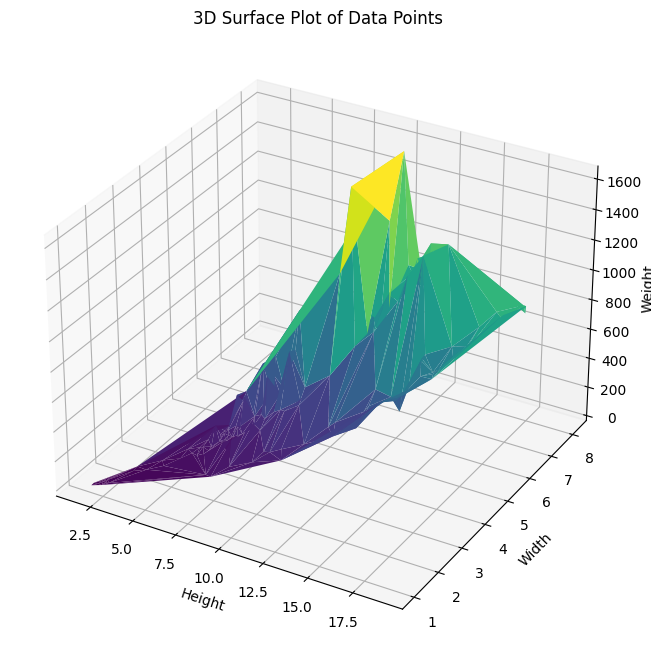

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loading the dataset into pandas dataframe
DataFrameB = pd.read_csv("Fish Data - A2.csv")

# Assuming 'Feature1', 'Feature2', and 'Target' are the column names in your dataframe
feature1 = DataFrameB['Height']
feature2 = DataFrameB['Width']
target = DataFrameB['Weight']

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(feature1, feature2, target, cmap='viridis', edgecolor='none')
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')
ax.set_title('3D Surface Plot of Data Points')
plt.show()

### **Task 2 : Polynomial Regression**

In [64]:
# Seperating features and targets
x_B = np.ones((len(training_B), len(features)))
y_B = np.ones((len(training_B), 1))
x_B = training_B[features].values.reshape(len(training_B), len(features))
y_B = training_B[columns[-1]].values.reshape(len(training_B), 1)

In [65]:
# Applying Batch Gradient Descent
def bgd(X_poly, w, y_cap, y, learning_rate):
    n = len(y);
    gradient = (1 / n) * np.dot(X_poly.T, (y - y_cap))
    w += learning_rate * gradient
    return w

# Calculating Least Mean Square Error
def LMSError(y_cap, y):
    n = len(y)
    totalSquaredError = np.mean((y_cap - y) ** 2)
    meanSquaredError = (1 / n) * totalSquaredError
    return meanSquaredError

# Creating x matrix
def createPoly(x, i):
    X_poly = np.ones((len(x), i + 1))
    for j in range(1, i + 1):
        X_poly[:, j] = x[:, 0] ** j
    return X_poly

def transformation(X_poly):
    phiX =  (X_poly[:, 0] + X_poly[:, 1]) / 2
    return phiX.reshape(-1, 1)

TRAINING ERRORS FOR POLYNOMIAL REGRESSION WITHOUT REGULARISATION

In [66]:
# List for errors obtained for every degree
trainingErrorList_B = []

# List for final error values of every degree
finalTrainingErrors_B = []

# List of weights of polynomials
weightsPoly_B = []
Y_B = []
maxDegree = 10
learning_rate = 0.00001

# Iterations
epochs = 500000
phiX_B = transformation(x_B)

# Developing polynomial models
for i in range(1, maxDegree):
    errors = []
    X_poly_B = createPoly(phiX_B, i)
    w = np.ones((i+1,1))
    w *= 38
    for j in range(epochs):
        y_cap = np.dot(X_poly_B, w)
        errors.append(LMSError(y_cap, y_B))
        w = bgd(X_poly_B, w, y_cap, y_B, learning_rate)
    Y_B.append(np.dot(X_poly_B, w))
    weightsPoly_B.append(w)
    trainingErrorList_B.append(errors)
    finalTrainingErrors_B.append(errors[-1])

print(finalTrainingErrors_B)

[319.6304188907144, 302.3419771913826, 332.12400535478275, 320.733375504593, 298.2206331050855, 310.71923511313435, 322.4849508385067, 313.99038622914003, 303.0002002195573]


TESTING ERRORS FOR POLYNOMIAL REGRESSION WITHOUT REGULARISATION

In [67]:
# Seperating features and targets
x_test_B = np.ones((len(testing_B), len(features)))
y_test_B = np.ones((len(testing_B), 1))
x_test_B = testing_B[features].values.reshape(len(testing_B), len(features))
y_test_B = testing_B[columns[-1]].values.reshape(len(testing_B), 1)
Y_TEST_B = []
phiX_test_B = transformation(x_test_B)

finalTestingErrors_B = []
for i in range(1, maxDegree):
    X = createPoly(phiX_test_B,i)
    y_cap = np.dot(X, weightsPoly[i - 1])
    finalTestingErrors_B.append(LMSError(y_cap, y_test_B))
    Y_TEST_B.append(np.dot(X, weightsPoly[i - 1]))
print(finalTestingErrors_B)

[7933.8707992861855, 7927.315354400057, 7909.387128940094, 7907.133267604843, 7905.4286235492555, 7906.754216560516, 7907.679099610471, 7908.201578030963, 7909.7211227494945]


PLOTTING TRAINING AND TESTING ERRORS

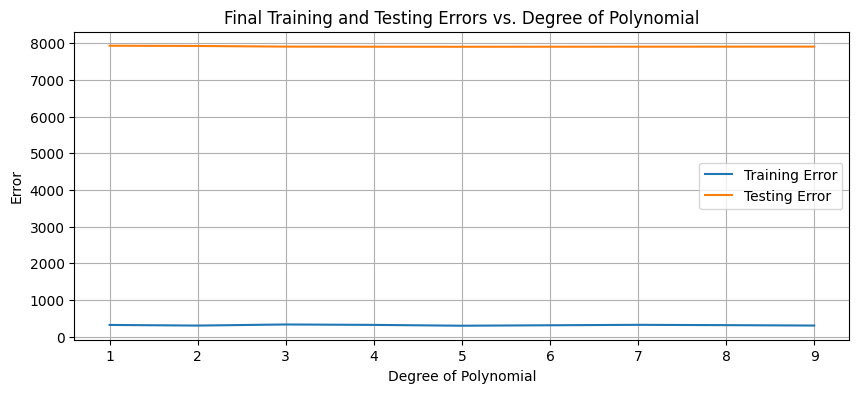

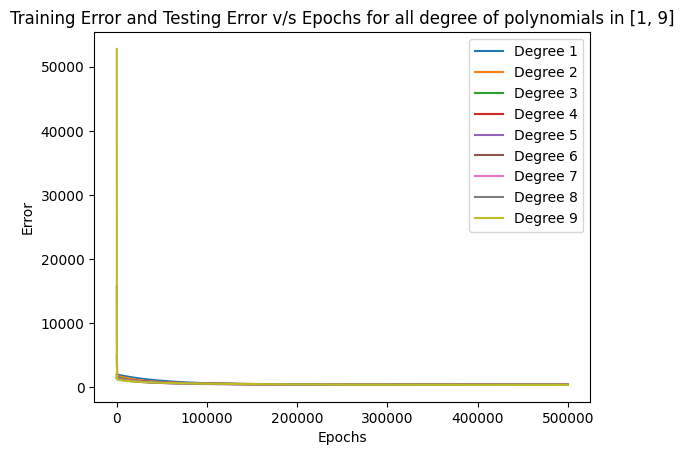

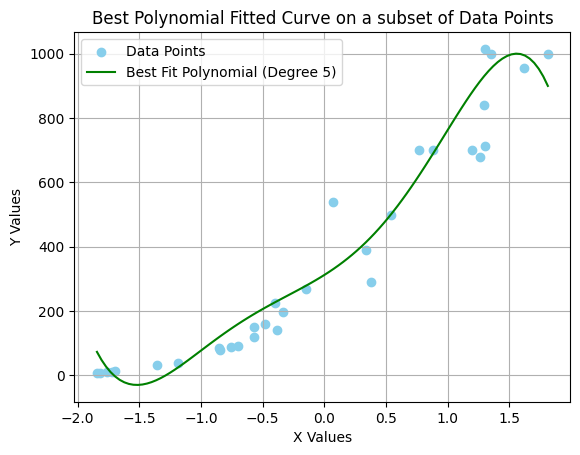

In [68]:
import matplotlib.pyplot as plt

# Plot Final Training and Testing Errors vs. Degree of Polynomial
plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(1, maxDegree), finalTrainingErrors_B, label='Training Error')
plt.plot(range(1, maxDegree), finalTestingErrors_B, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Final Training and Testing Errors vs. Degree of Polynomial')
plt.legend()
plt.show()

print("\n")

# Plot Training and Testing Errors vs. Epochs for All Degrees
for degree in range(maxDegree - 1):
    plt.plot(range(epochs), trainingErrorList_B[degree], label=f'Degree {degree+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
plt.title('Training Error and Testing Error v/s Epochs for all degree of polynomials in [1, 9]')
plt.show()

print("\n")

# Finding the degree of the best model (degree with the lowest final training error)
best_degree = np.argmin(finalTestingErrors_B) + 1
best_model_coefficients = weightsPoly_B[best_degree - 1]
plt.scatter(phiX_test_B, y_test_B, label='Data Points', color='skyblue')
x_values = np.linspace(min(phiX_test_B), max(phiX_test_B), 100)
X_best_model = createPoly(x_values, best_degree)
y_fitted = np.dot(X_best_model, best_model_coefficients)
plt.plot(x_values, y_fitted, label=f'Best Fit Polynomial (Degree {best_degree})', color='g')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Best Polynomial Fitted Curve on a subset of Data Points')
plt.legend()
plt.grid(True)
plt.show()

APPLYING REGULARIZATION USING BGD AND SGD

In [69]:
# Batch Gradient Descent with Regularizations
def bgdRegularized(X_poly, w, y_cap, y, learning_rate, regularization_rate, q):
    gradient = []
    if q == 0.5:
        gradient = np.dot(X_poly.T, (y_cap - y)) + (regularization_rate / 4) * ((abs(w)) ** (-0.5))

    elif q == 1:
        gradient = np.dot(X_poly.T, (y_cap - y)) + (regularization_rate / 2) * np.sign(w)

    elif q == 2:
        gradient = np.dot(X_poly.T, (y_cap - y)) + regularization_rate * w

    elif q == 4:
        gradient = np.dot(X_poly.T, (y_cap - y)) + (2 * regularization_rate) * (w ** 3)

    w -= learning_rate * gradient
    return w

In [70]:
# Stochastic Gradient Descent with Regularizations
def sgdRegularized(X_poly, w, y_cap, y, index, learning_rate, regularization_rate, q):
    gradient = []
    if q == 0.5:
        gradient = np.dot(X_poly[index, :].reshape(-1, 1), (y_cap[index] - y[index]).reshape(-1, 1)) + (regularization_rate / 4) * (abs(w) ** (-0.5))

    elif q == 1:
        gradient = np.dot(X_poly[index, :].reshape(-1, 1), (y_cap[index] - y[index]).reshape(-1, 1)) + (regularization_rate / 2) * np.sign(w)

    elif q == 2:
        gradient = np.dot(X_poly[index, :].reshape(-1, 1), (y_cap[index] - y[index]).reshape(-1, 1)) + regularization_rate * w

    elif q == 4:
        gradient = np.dot(X_poly[index, :].reshape(-1, 1), (y_cap[index] - y[index]).reshape(-1, 1)) + (2 * regularization_rate) * (w ** 3)

    w -= learning_rate * gradient
    return w

In [71]:
def LMSErrorRegularized(y_cap, y, regularization_rate, q, w):
    regularizedError = 0.0
    n = len(y_cap)
    if q == 0.5:
        regularizedError = (regularization_rate / 2) * np.sum((abs(w) ** (0.5)))

    elif q == 1:
        regularizedError = (regularization_rate / 2) * np.sum((abs(w)))

    elif q == 2:
        regularizedError = (regularization_rate / 2) * np.sum((w ** 2))

    elif q == 4:
        regularizedError = (regularization_rate / 2) * np.sum((w ** 4))

    totalError = (1 / n) * np.mean((y_cap - y) ** 2) + regularizedError
    return totalError

### *Batch Gradient Descent*

In [72]:
trainingErrorsBGD = [None] * 4
weights_regularizedBGD = [None] * 4
finalTrainingErrorsBGD = [None] * 4
finalTestingErrorsBGD = [None] * 4

X_poly = createPoly(phiX_B, best_degree)
X = createPoly(phiX_test_B, best_degree)

***Q = 0.5***



In [73]:
learning_rate = 0.0001
regularization_rate = 0.001
epochs = 20000
q = 0.5
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    w = bgdRegularized(X_poly, w, y_cap, y_B, learning_rate, regularization_rate, q)

weights_regularizedBGD[0] = w
trainingErrorsBGD[0] = errors
finalTrainingErrorsBGD[0] = errors[-1]

print(finalTrainingErrorsBGD[:1])

[285.31376085327]


In [74]:
y_cap = np.dot(X, weights_regularizedBGD[0])
finalTestingErrorsBGD[0] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedBGD[0])

print(finalTestingErrorsBGD[:1])

[221.77820553611483]


***Q = 1***

In [75]:
learning_rate = 0.0001
regularization_rate = 0.001
epochs = 20000
q = 1
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    w = bgdRegularized(X_poly, w, y_cap, y_B, learning_rate, regularization_rate, q)

weights_regularizedBGD[1] = w
trainingErrorsBGD[1] = errors
finalTrainingErrorsBGD[1] = errors[-1]

print(finalTrainingErrorsBGD[:2])

[285.31376085327, 285.70922560987304]


In [76]:
y_cap = np.dot(X, weights_regularizedBGD[1])
finalTestingErrorsBGD[1] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedBGD[1])

print(finalTestingErrorsBGD[:2])

[221.77820553611483, 222.17368839576733]


***Q = 2***

In [77]:
learning_rate = 0.0001
regularization_rate = 0.000001
epochs = 20000
q = 2
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    w = bgdRegularized(X_poly, w, y_cap, y_B, learning_rate, regularization_rate, q)

weights_regularizedBGD[2] = w
trainingErrorsBGD[2] = errors
finalTrainingErrorsBGD[2] = errors[-1]

print(finalTrainingErrorsBGD[:3])

[285.31376085327, 285.70922560987304, 285.42675343248357]


In [78]:
y_cap = np.dot(X, weights_regularizedBGD[2])
finalTestingErrorsBGD[2] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedBGD[2])

print(finalTestingErrorsBGD[:3])

[221.77820553611483, 222.17368839576733, 221.89119986918783]


***Q = 4***

In [79]:
learning_rate = 0.0001
regularization_rate = 0.00000000001
epochs = 20000
q = 4
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    w = bgdRegularized(X_poly, w, y_cap, y_B, learning_rate, regularization_rate, q)

weights_regularizedBGD[3] = w
trainingErrorsBGD[3] = errors
finalTrainingErrorsBGD[3] = errors[-1]

print(finalTrainingErrorsBGD[:4])

[285.31376085327, 285.70922560987304, 285.42675343248357, 285.48016130395354]


In [80]:
y_cap = np.dot(X, weights_regularizedBGD[3])
finalTestingErrorsBGD[3] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedBGD[3])

print(finalTestingErrorsBGD[:4])

[221.77820553611483, 222.17368839576733, 221.89119986918783, 221.94460686372472]


### *Stchastic Gradient Descent*

In [81]:
trainingErrorsSGD = [None] * 4
weights_regularizedSGD = [None] * 4
finalTrainingErrorsSGD = [None] * 4
finalTestingErrorsSGD = [None] * 4

X_poly = createPoly(phiX_B, best_degree)

***Q = 0.5***

In [82]:
learning_rate = 0.0001
regularization_rate = 0.000001
epochs = 200000
q = 0.5
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    index = r.randint(0, len(X_poly) - 1)
    w = sgdRegularized(X_poly, w, y_cap, y_B, index, learning_rate, regularization_rate, q)

weights_regularizedSGD[0] = w
trainingErrorsSGD[0] = errors
finalTrainingErrorsSGD[0] = errors[-1]

print(finalTrainingErrorsSGD[:1])

[290.4843956111493]


In [83]:
y_cap = np.dot(X, weights_regularizedSGD[0])
finalTestingErrorsSGD[0] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedSGD[0])

print(finalTestingErrorsSGD[:1])

[263.0981833689283]


***Q = 1***

In [84]:
learning_rate = 0.0001
regularization_rate = 0.0000001
epochs = 200000
q = 1
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    index = r.randint(0, len(X_poly) - 1)
    w = sgdRegularized(X_poly, w, y_cap, y_B, index, learning_rate, regularization_rate, q)

weights_regularizedSGD[1] = w
trainingErrorsSGD[1] = errors
finalTrainingErrorsSGD[1] = errors[-1]

print(finalTrainingErrorsSGD[:2])

[290.4843956111493, 290.4022646177059]


In [85]:
y_cap = np.dot(X, weights_regularizedSGD[1])
finalTestingErrorsSGD[1] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedSGD[0])

print(finalTestingErrorsSGD[:2])

[263.0981833689283, 273.72965296596124]


***Q = 2***

In [86]:
learning_rate = 0.0001
regularization_rate = 0.00000000001
epochs = 200000
q = 2
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    index = r.randint(0, len(X_poly) - 1)
    w = sgdRegularized(X_poly, w, y_cap, y_B, index, learning_rate, regularization_rate, q)

weights_regularizedSGD[2] = w
trainingErrorsSGD[2] = errors
finalTrainingErrorsSGD[2] = errors[-1]

print(finalTrainingErrorsSGD[:3])

[290.4843956111493, 290.4022646177059, 290.31322889819666]


In [87]:
y_cap = np.dot(X, weights_regularizedSGD[2])
finalTestingErrorsSGD[2] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedSGD[0])

print(finalTestingErrorsSGD[:3])

[263.0981833689283, 273.72965296596124, 271.5510557180068]


***Q = 4***

In [88]:
learning_rate = 0.0001
regularization_rate = 0.00000000000001
epochs = 200000
q = 4
errors = []

w = np.ones((best_degree + 1,1))
for j in range(epochs):
    y_cap = np.dot(X_poly, w)
    errors.append(LMSErrorRegularized(y_cap, y_B, regularization_rate, q, w))
    index = r.randint(0, len(X_poly) - 1)
    w = sgdRegularized(X_poly, w, y_cap, y_B, index, learning_rate, regularization_rate, q)

weights_regularizedSGD[3] = w
trainingErrorsSGD[3] = errors
finalTrainingErrorsSGD[3] = errors[-1]

print(finalTrainingErrorsSGD[:4])

[290.4843956111493, 290.4022646177059, 290.31322889819666, 290.31002699783]


In [89]:
y_cap = np.dot(X, weights_regularizedSGD[3])
finalTestingErrorsSGD[3] = LMSErrorRegularized(y_cap, y_test_B, regularization_rate, q, weights_regularizedSGD[0])

print(finalTestingErrorsSGD[:4])

[263.0981833689283, 273.72965296596124, 271.5510557180068, 265.03449964939745]


### **Task 3: Graph Plotting**

SURFACE PLOT OF TRAINING PREDICTIONS

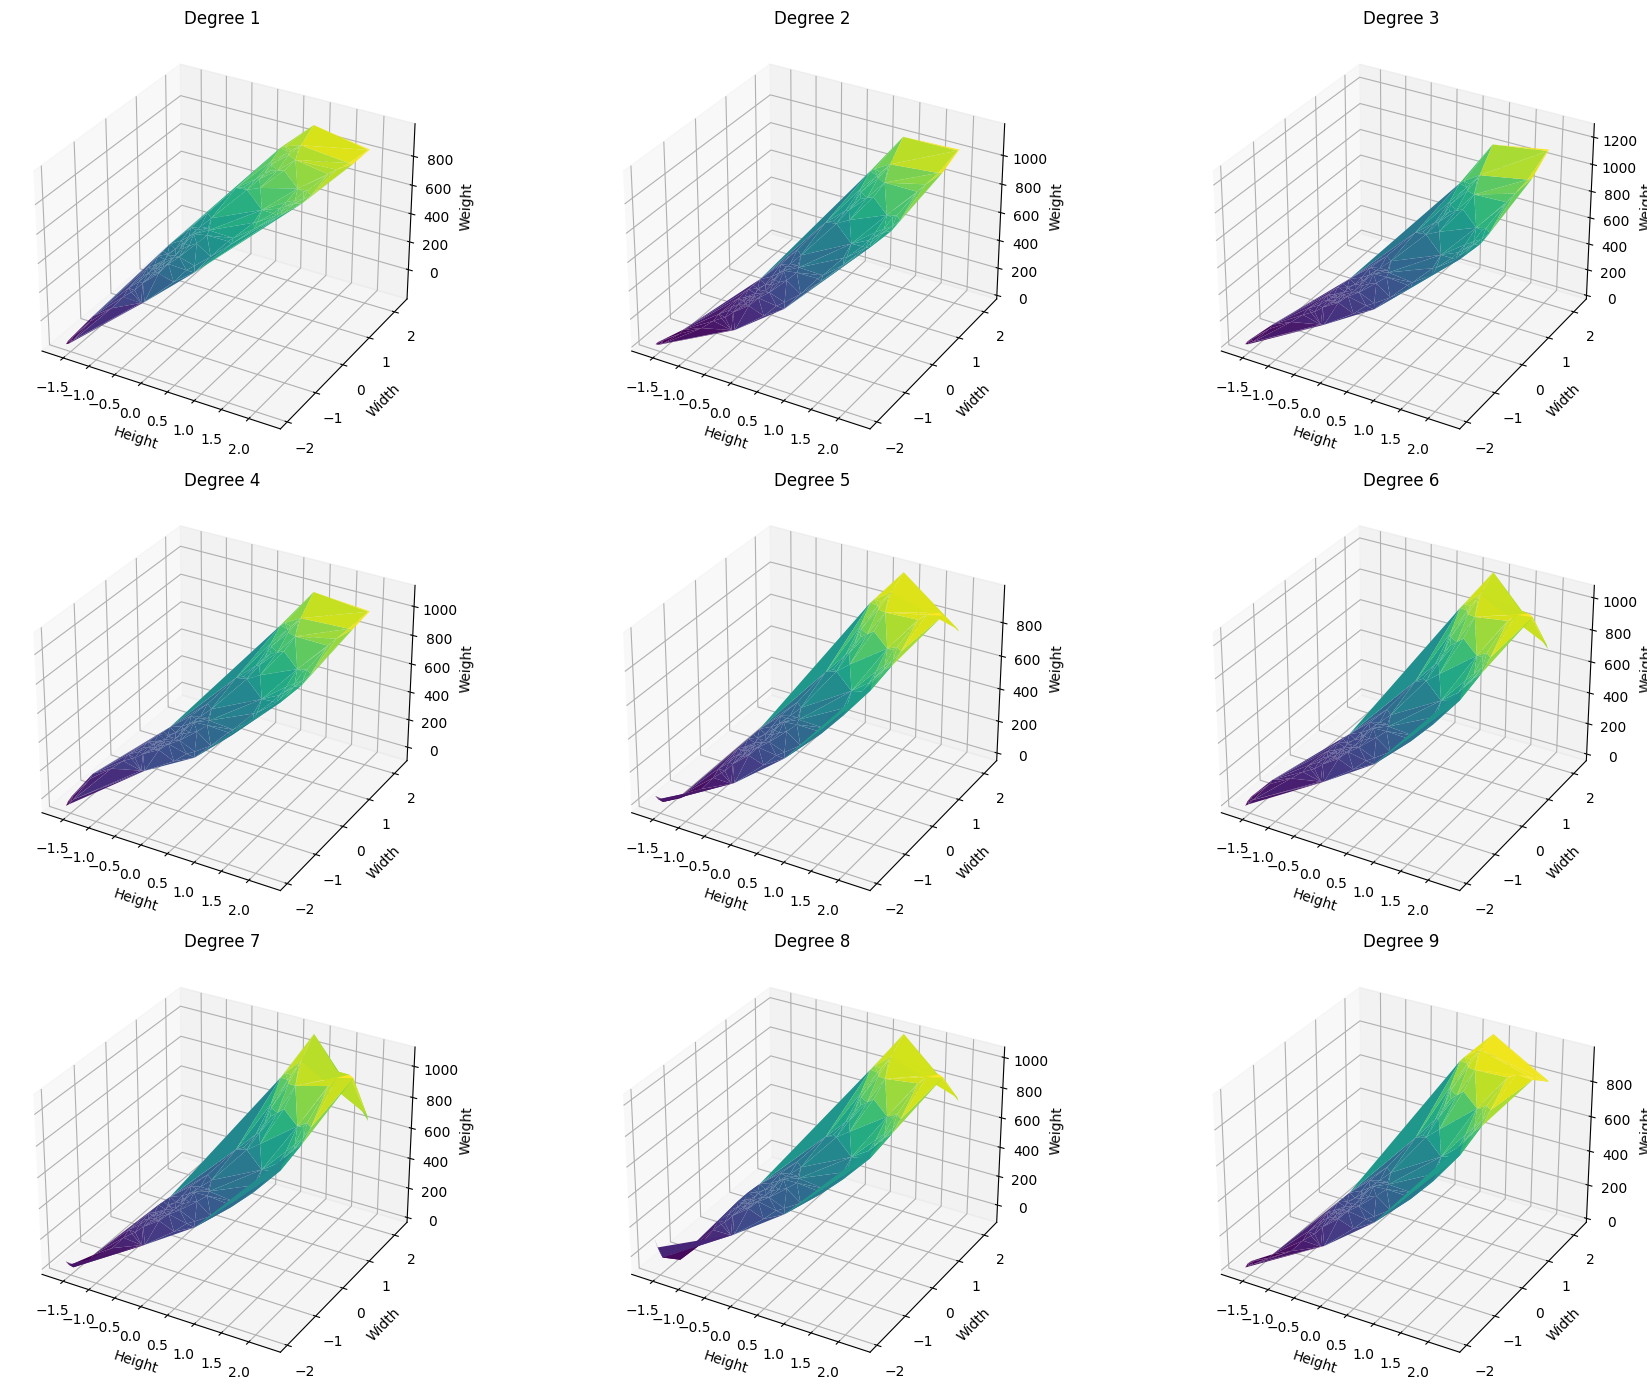

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

feature1 = x_B[:, 0]
feature2 = x_B[:, 1]

# Creates a 3D surface plot
fig = plt.figure(figsize=(19, 14))

for i in range(1, maxDegree):
    target = Y_B[i - 1].reshape(len(feature1))
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.plot_trisurf(feature1, feature2, target, cmap='viridis', edgecolor='none')
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Weight')
    ax.set_title(f'Degree {i}')

plt.tight_layout()
plt.show()

SURFACE PLOT OF TESTING PREDICTIONS

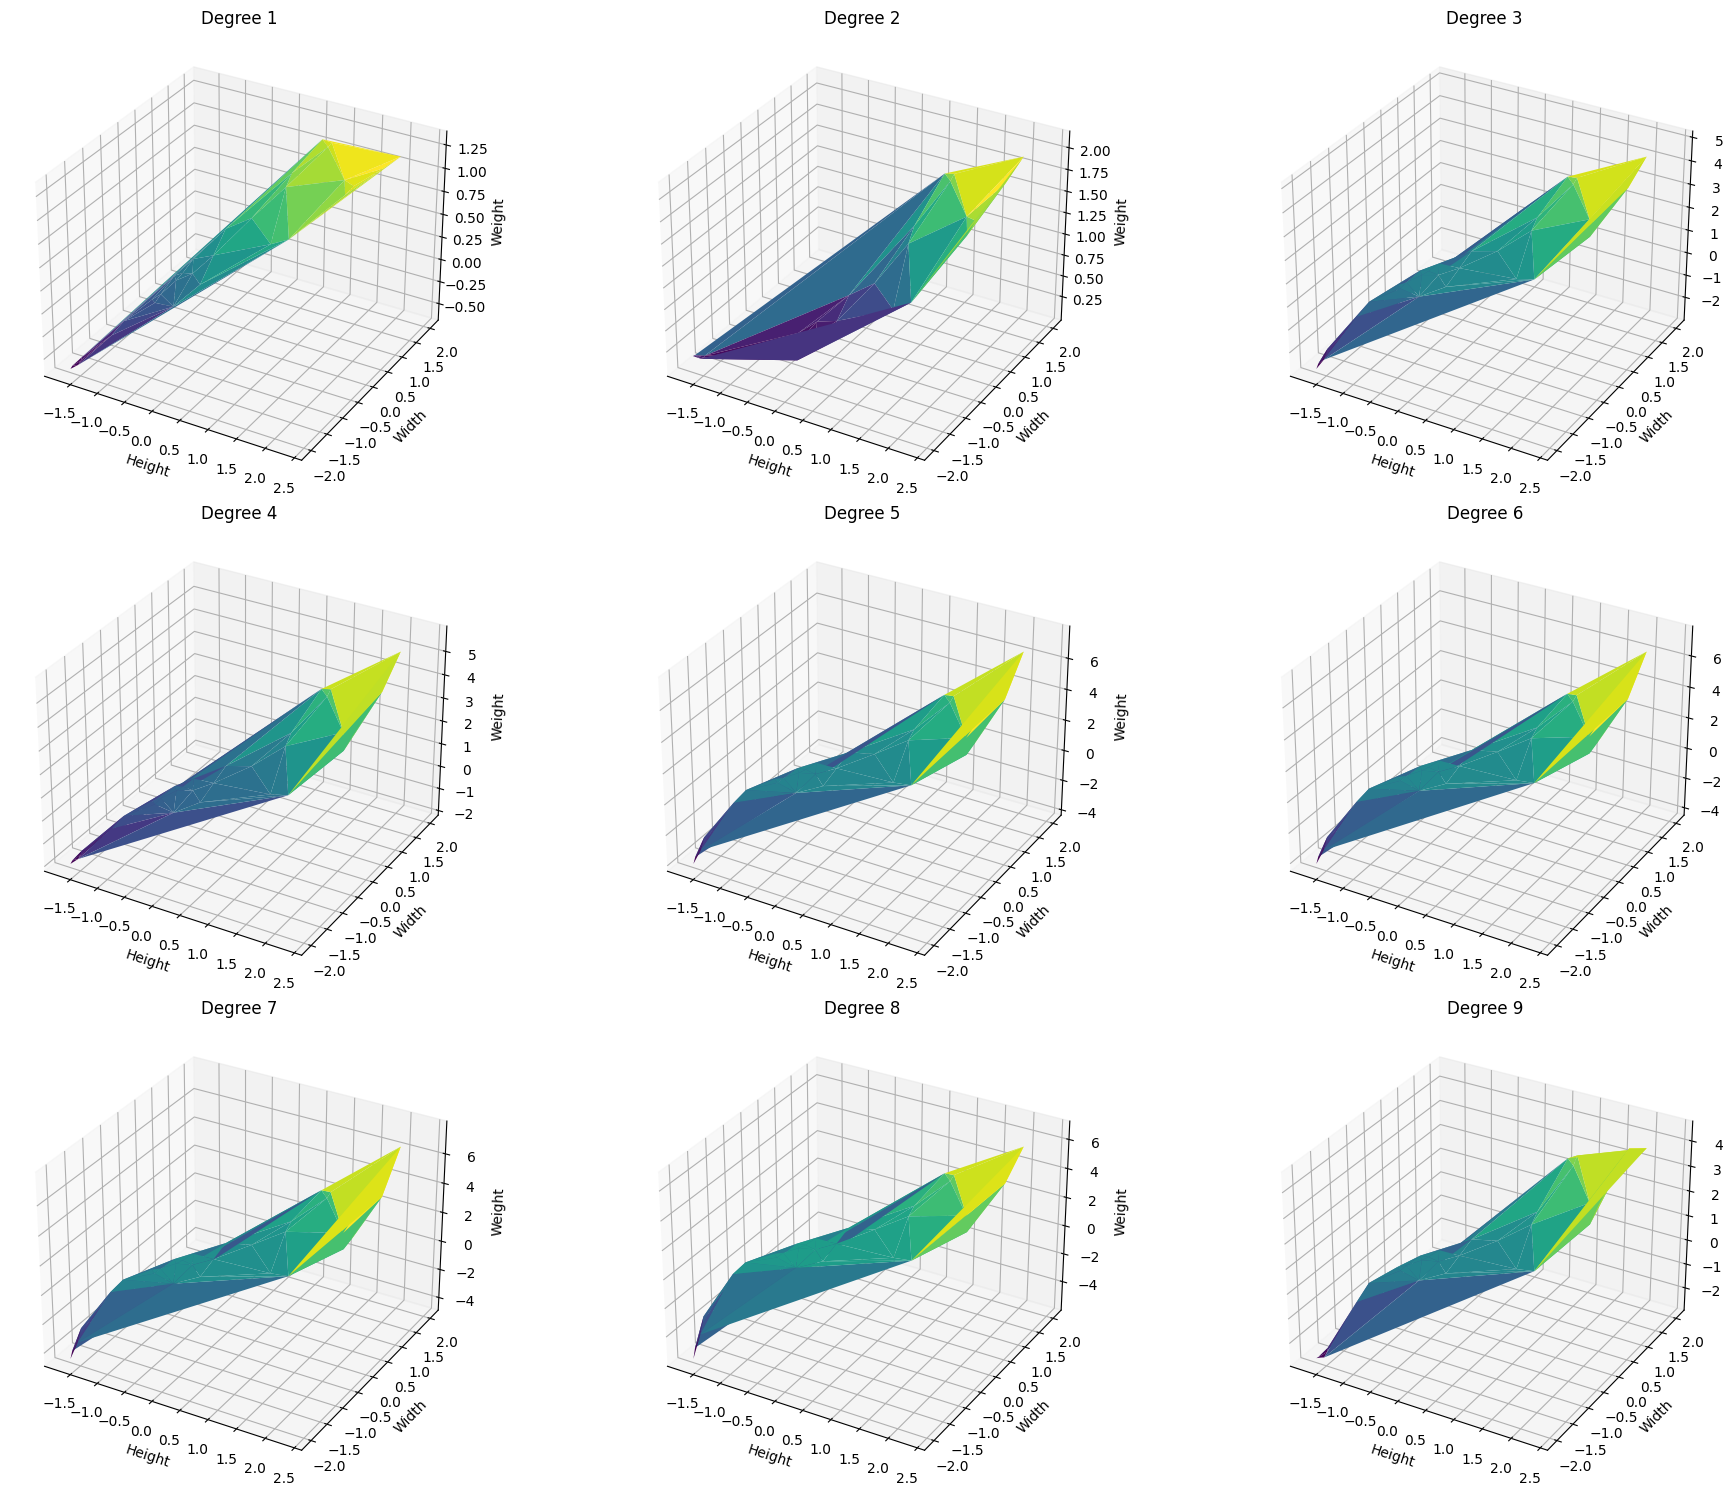

In [91]:
import pandas as pd

feature1 = x_test_B[:, 0]
feature2 = x_test_B[:, 1]

# Creates a 3D surface plot
fig = plt.figure(figsize=(20, 15))

for i in range(1, maxDegree):
    target = Y_TEST_B[i - 1].reshape(len(feature1))
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.plot_trisurf(feature1, feature2, target, cmap='viridis', edgecolor='none')
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Weight')
    ax.set_title(f'Degree {i}')

plt.tight_layout()
plt.show()

SURFACE PLOTS OF NON-REGULARISED POLYNOMIALS

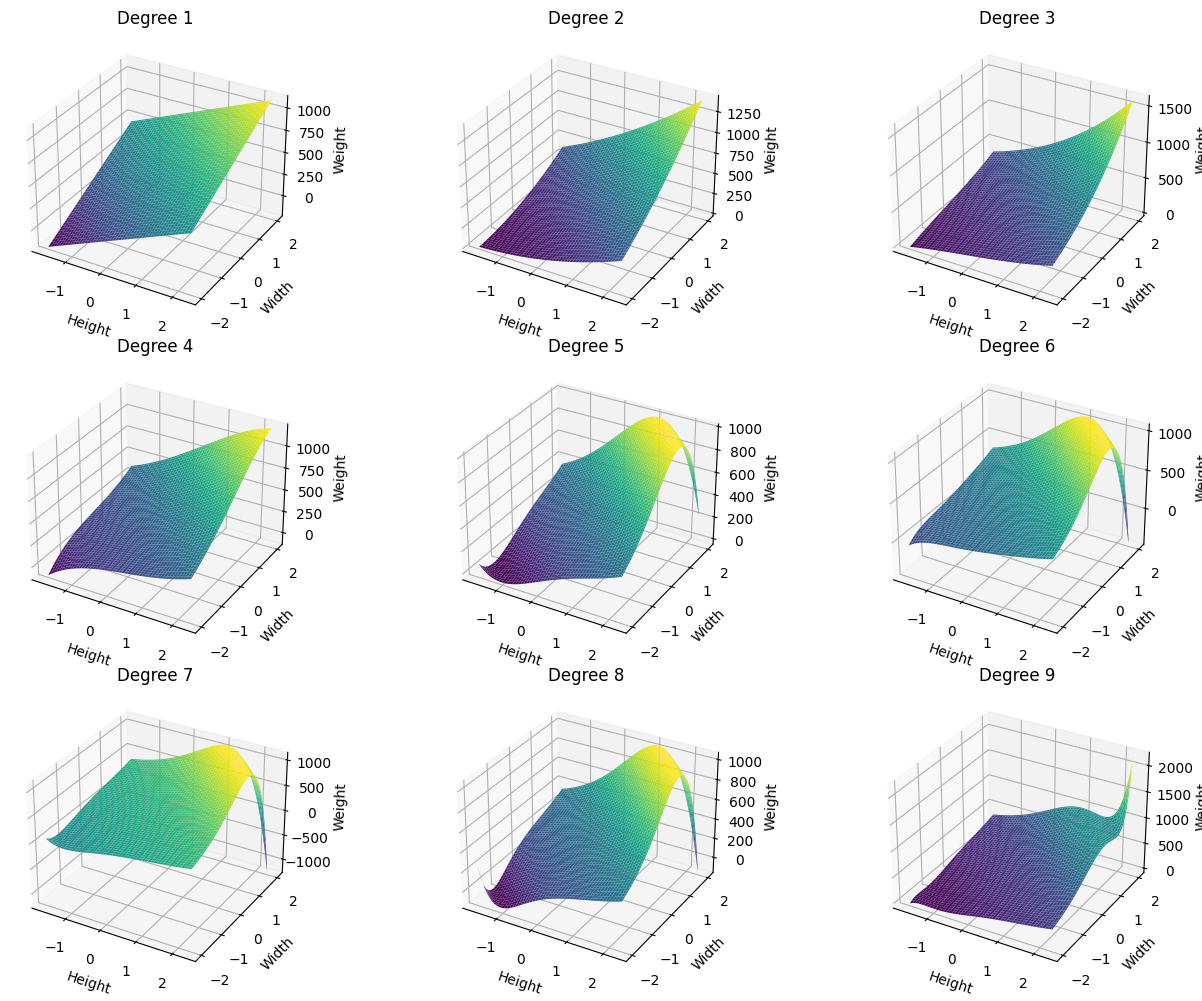

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generates sample data for the surface plot
x_range = np.linspace(min(x_test_B[:, 0]), max(x_test_B[:, 0]), 100)
y_range = np.linspace(min(x_test_B[:, 1]), max(x_test_B[:, 1]), 100)
X, Y = np.meshgrid(x_range, y_range)

# Creates a new figure
fig = plt.figure(figsize=(14, 10))

for i in range(1, maxDegree):
    # Developing model for the current degree
    X_test_model = createPoly(transformation(np.column_stack((X.flatten(), Y.flatten()))), i)
    # Predicting using the trained model
    Z = np.dot(X_test_model, weightsPoly_B[i - 1]).reshape(X.shape)

    # Creates 3D subplot
    ax = fig.add_subplot(3, 3, i, projection='3d')
    ax.set_title(f'Degree {i}')

    # Plotting the surface
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Weight')

plt.tight_layout()
plt.show()

BGD SURFACE PLOT FOR ALL FOUR Q VALUES

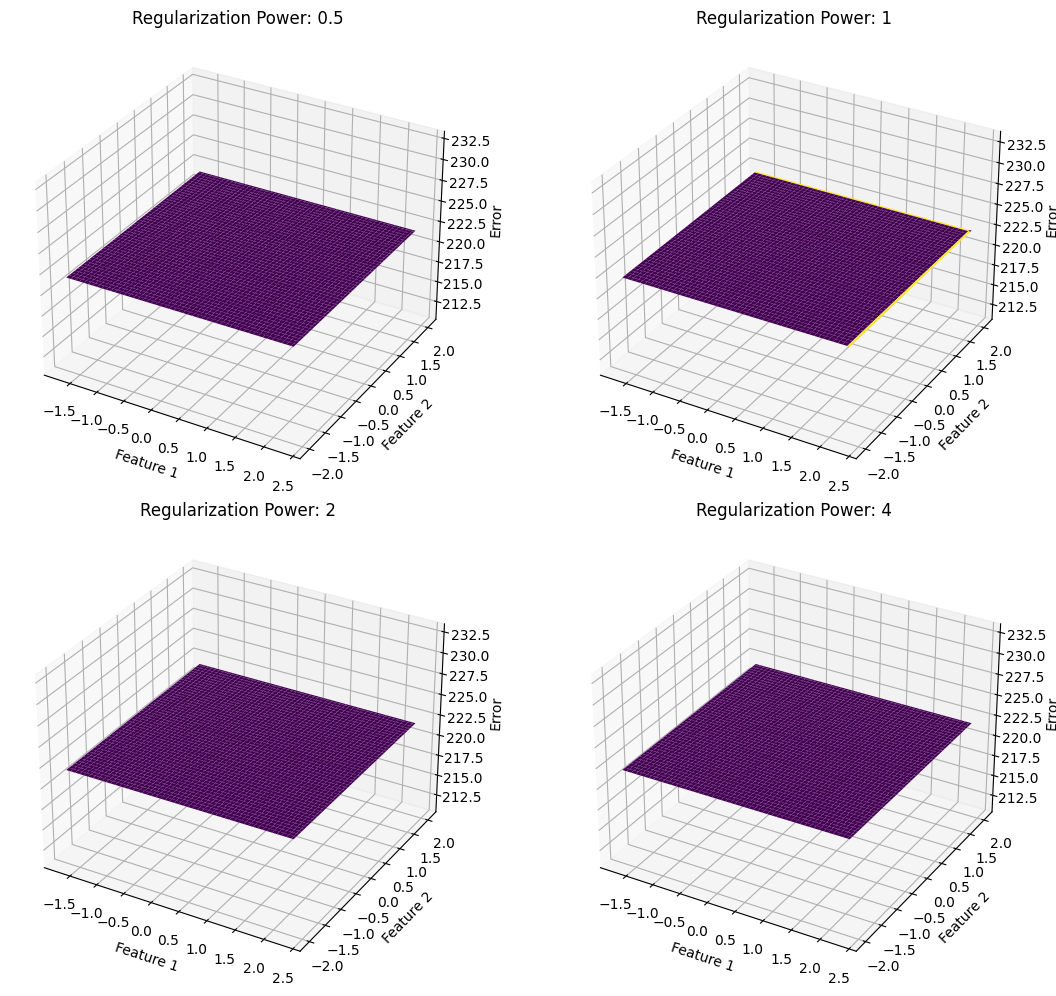

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming finalTestingErrorsBGD contains error values for four regularization powers
regularization_powers = [0.5, 1, 2, 4]

# Generates sample data for the surface plots
feature_1_values = np.linspace(np.min(x_test_B[:, 0]), np.max(x_test_B[:, 0]), 100)  # Corrected min and max usage
feature_2_values = np.linspace(np.min(x_test_B[:, 1]), np.max(x_test_B[:, 1]), 100)  # Corrected min and max usage
feature_1_mesh, feature_2_mesh = np.meshgrid(feature_1_values, feature_2_values)

# Creates a new figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

for i, q in enumerate(regularization_powers):
    # Get error values for the current regularization power
    current_error = finalTestingErrorsBGD[i]

    # Creates a 2D grid for current_error
    error_mesh = np.tile(current_error, (len(feature_1_values), 1))

    # Plotting the surface for Feature 1, Feature 2, and Error
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot_surface(feature_1_mesh, feature_2_mesh, error_mesh, cmap='viridis')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Error')
    ax.set_title(f'Regularization Power: {q}')

# Adjusting layout
plt.tight_layout()
plt.show()

SGD SURFACE PLOT FOR ALL FOUR Q VALUES

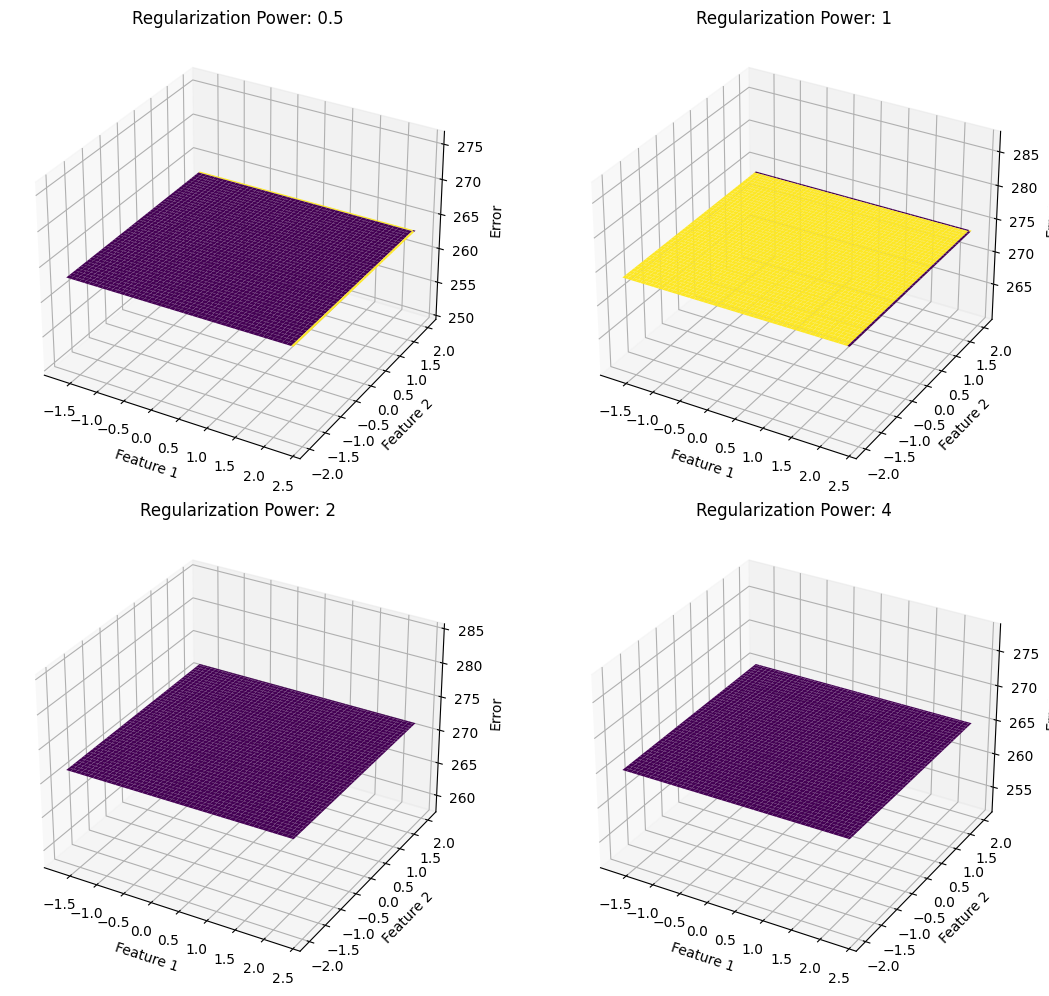

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming finalTestingErrorsSGD contains error values for four regularization powers
regularization_powers = [0.5, 1, 2, 4]

# Generate sample data for the surface plots
feature_1_values = np.linspace(np.min(x_test_B[:, 0]), np.max(x_test_B[:, 0]), 100)  # Corrected min and max usage
feature_2_values = np.linspace(np.min(x_test_B[:, 1]), np.max(x_test_B[:, 1]), 100)  # Corrected min and max usage
feature_1_mesh, feature_2_mesh = np.meshgrid(feature_1_values, feature_2_values)

# Creates a new figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

for i, q in enumerate(regularization_powers):
    # Get error values for the current regularization power
    current_error = finalTestingErrorsSGD[i]

    # Creates a 2D grid for current_error
    error_mesh = np.tile(current_error, (len(feature_1_values), 1))

    # Plotting the surface for Feature 1, Feature 2, and Error
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot_surface(feature_1_mesh, feature_2_mesh, error_mesh, cmap='viridis')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Error')
    ax.set_title(f'Regularization Power: {q}')

# Adjusting layout
plt.tight_layout()
plt.show()

### **Task 4: Comparative analysis**



In this analysis, we developed nine polynomial regression models with degrees ranging from 0 to 9 to predict a target variable based on two input features. Next, we constructed regularized polynomial regression models with different generalized error functions (parameterized by q) and experimented with various λ values between 0 and 1 to find the optimal model for each value of q. We employed both Stochastic and Batch Gradient Descent methods and reported the best models obtained through these approaches for each value of q.



**Analysis of Polynomial Regression Without Regularization:**

.As the degree of the polynomial increases, training errors generally decrease, indicating that the model fits the training data better.

.However, testing errors increase after reaching a peak at degree 5, which suggests overfitting. This is when the model starts fitting noise in the training data, making it perform poorly on unseen data.

.Among the tested degrees, the degree 5 polynomial model has the lowest testing error, making it the best fit in terms of minimizing test errors.



**Regularized Polynomial Regression Analysis (Using Batch Gradient Descent):**

.Introducing regularization slightly reduces training errors, which indicates that regularization is effective in controlling overfitting to some extent.

.However, testing errors remain relatively high. This suggests that even with regularization, the model still struggles to generalize well to unseen data.



**Regularized Polynomial Regression Analysis (Using Stochastic Gradient Descent):**

.When applying stochastic gradient descent with regularization, training errors exhibit a similar trend to those observed with batch gradient descent.

.Testing errors also follow a similar pattern, indicating that stochastic gradient descent does not significantly improve the model's generalization ability compared to batch gradient descent.



***Conclusion:***

.In the absence of regularization, the degree 5 polynomial model performs the best, but it suffers from overfitting when applied to unseen data. This is evident from the increase in testing errors beyond degree 5.

.The introduction of regularization helps mitigate overfitting by reducing training errors. However, the models still struggle to generalize well to unseen data, as evidenced by the relatively high testing errors.

.Regularization is a valuable tool for improving the robustness of polynomial regression models, but it may not entirely eliminate the overfitting problem. Model selection and hyperparameter tuning remain critical for achieving the best trade-off between fitting the training data and generalizing to new data.
